# 5.1 최적화 기초

- 최적화 문제는 함수 f의 값을 최대화 혹은 최소화 하는 변수 x값 x*를 찾는 것
    - x* = argmax f(x) or argmin f(x) 의 값 x* 를 최적화 문제의 해라고 함.
    
    
- 이때 최소화하려는 함수 f(x)를 목적함수, 비용함수, 손실함수, 오차함수 등으로 부르고 기호로는 J, C, L, E로 표기하는 경우가 많음


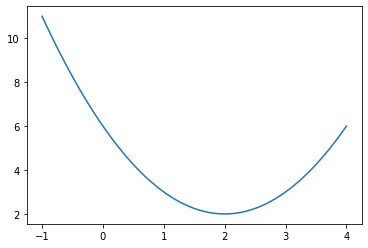

In [1]:
# 1차원 목적함수의 예
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx))
plt.show()

<br/><br/>< 다른 예 >

- 로젠브록 함수 : 수학적 최적화에서 최적화 알고리듬을 시험해볼 용도로 사용하는 비볼록함수, 그래프를 그려 보면, 길고 좁은 포물선 모양의 골짜기가 드러남. 전역최솟값으로 수렴하는 것이 어려움
- $ f(x, y) = (1-x)^2 + 100(y-x^2)^2 $

![python image2](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/360px-Rosenbrock_function.svg.png)

- '목적함수의 값을 가장 작게하는 x 위치를 찾는 최적화 문제'를 푸는 가장 간단한 방법은 가능한 x값을 여러개 넣어보고 그 중 가장 작은 값을 선택하는 그리드 서치(Grid search) 방법.
- 함수 f1(x)의 그래프를 그려 최저점을 찾은 방법도 그리드 서치 방법의 일종. 그리드 서치는 가장 간단한 방법이지만 많은 x 위치에 대해 목적함숫값을 계산해야 함. 위의 예에서도 최저점을 찾기위해 함수 계산을 100번 수행<br/><br/>
- 예측 모형을 만들 때 그리드 서치 방법을 수행하면 계산량이 상당히 큼. 따라서 효율적인 방법이 필요함
- 반복적 시행착오에 의해 최적화 필요조건을 만족하는 값 x*를 찾는 방법을 수치적 최적화라고 함. 이는 함수 위치가 최저점이 될 때까지 가능한 적은 횟수만큼 x 위치를 옮기는 방법을 말함
- 최적화 방법은 다음 두 가지 알고리즘을 요구함
    - 현재 어떤 위치 $x_k$가 최적점인지 판단하는 알고리즘: (편)미분 값 = 0인 지점
    - 어떤 위치 $x_k$를 시도한 뒤, 다음번에 시도할 위치 $x_{k+1}$을 찾는 알고리즘: 최대경사법(단순히 현재 위치 $x_k$에서 기울기 $g(x_k)$만을 이용하여 다음 위치를 결정하는 방법)

### 최대 경사법
$x_{k+1} = x_k - \mu \triangledown f(x_k) = x_k - \mu g(x_k)$

- 만약 현재 위치 x_k에서 기울기가 음수면 (곡면이 아래로 향하면) g(x_k) < 0 이므로 앞으로 진행, 양수면 반대로 진행. 이 때 위치를 옮기는 거리를 결정하는 비례상수 $\mu$를 스텝사이즈라고 함.
- x_k가 최적점에 도달했을 때는 더이상 위치를 옮기지 않음

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 1.60, g_2 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16


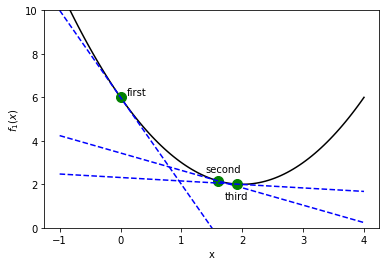

In [2]:
# 최대경사법 예

def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "first")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "second")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "third")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.ylim(0, 10)
plt.show()

- 최대경사법에서는 스텝 사이즈의 크기를 적절히 조정하는 것이 중요함. 보통 스텝사이즈를 사용자가 경험적으로 얻는 값으로 고정하거나 특정 알고리즘에 따라 변화시킴
- 스텝사이즈가 클 경우 발산함

### 진동현상

- 최대경사법 방법은 곡면의 모양이 계곡과 같이 생긴 경우, 즉 그레디언트 벡터가 최저점을 가리키고 있지 않은 경우에는 진동 현상이 발생함. 따라서 수렴하기까지 시간이 오래 걸림
- 진동 현상을 없애는 방법으로는 2차 도함수(헤시안 행렬)을 이용하는 방법이나 모멘텀 방법이 있음.
- 모멘텀 방법은 진행방향으로 계속 진행하도록 성분(모멘텀)을 추가하는 것. 일반적인 경우에는 2차 도함수를 이용하는 방법을 사용하고 2차 도함수를 계산하기 어려운 인공신경망 등에서는 모멘텀방법을 선호함
- 책에서는 모멘텀방법을 다루지 않음

#### 2차 도함수를 사용한 뉴턴 방법

- 뉴턴 방법은 목적함수가 2차 함수라는 가정하에 한 번에 최저점을 찾음. 그레디언트 벡터에 헤시안 행렬의 역행렬을 곱해서 방향과 거리가 변형된 그레디언트 벡터를 사용
- 스텝 사이즈를 결정할 때 2차 도함수 이용 => 함수를 2차 테일러 전개로 근사한 후 x를 근사 다항식(포물선)의 극점으로 이동시키는 수식


- 뉴턴 방법의 경우, 2가지 특징이 있다. 하나는 convergence speed, 그리고 하나는 computation
    - convergence speed: 매우 빠르게 수렴함. 실제 convergence rate를 증명했을 때 gradient descent보다 빠르게 수렴. newton method는 기울기 뿐 아니라, 기울기의 기울기 정보도 같이 사용하기 때문에, 처음에 기울기가 크게 변하지 않을 때는 빠르게 감소하다가, 갑자기 기울기의 크기가 변하기 시작하면 그에 맞춰서 적절한 newton step을 찾을 수 있기 때문에 아주 빠르게 수렴할 수 있다. 특히 saddle point(인장점)에 대해 영향을 크게 받지 않기 때문에 gradient descent 보다는 훨씬 훨씬 빠르게 수렴
    - computation: Newton method의 근본적인 한계는 바로 Hessian을 계산해야한다는 점. 이 Hessian을 계산하는 것 자체도 매우 연산이 복잡할 뿐 아니라, gradient의 제곱 만큼의 공간이 필요하기 때문에 memory 역시 efficient하게 사용하기가 어려움. 때문에 매우 복잡한 함수에 대해서는 newton method를 사용하기가 매우 힘듦. 예를 들어서 neural network에서 gradient descent method를 사용하면 chain rule을 통해 아주 쉽게 그 값을 계산할 수 있지만, second derivation으로 넘어가는 순간, computation을 해야할 양이 급격하게 증가하고, 안그래도 부족한 메모리가 더 부족하게 되기 때문에 neural network에서는 사용되지 않는 방법
    
    
- 별 일이 없다면 gradient descent에서 fixed step size를 사용해 converge를 시키는 것이 practical하게는 가장 많이 쓰이고 있다. 하지만, 더 빠른 convergence speed가 필요하다면 line search나 steepest method, newton’s method를 한 번쯤은 고려해볼만 하다!

<br/><br/>
### 사이파이를 이용한 최적화

- 사이파이의 optimize 서브패키지는 최적화 명령 minimize()를 제공함. 세부적인 알고리즘은 method 인수로 선택. 디폴트 알고리즘은 뉴턴방법을 개조한 BFGS 방법

In [7]:
import scipy.optimize as opt

# 목적함수 재정의
def f1(x):
    return (x - 1) ** 2 + 3

x0 = 0  # 초깃값
result = opt.minimize(f1, x0)
print(result)

      fun: 3.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999999])


#### 전역최적화(global minimun) 문제

- 결과가 초기 추정값 및 알고리즘, 파라미터 등에 영향을 받기 때문에 local minimum에 빠질 수 있음

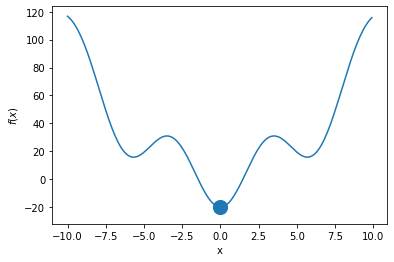

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))
plt.scatter(0, f_global(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.show()

      fun: 15.791736781359312
 hess_inv: array([[0.05417267]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.67920777])


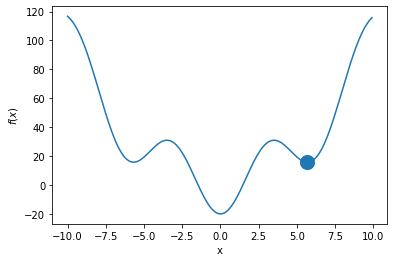

In [10]:
result = opt.minimize(f_global, 4)
print(result)
x_sol = result['x']
x_sol

plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.show()

<br/><br/><br/>

# 5.2 제한 조건이 있는 최적화 문제

- 제한조건을 가지는 최적화 문제 풀이. 제한조건은 연립방정식 or 연립부등식
- 연립방정식: 라그랑주 승수법: https://www.youtube.com/watch?v=lmD9p6J_-TA
- 연립부등식: KKT 조건


    * 라그랑주 승수법의 원리는 사실, 두가지 조건을 동시에 만족시키는 공통접선을 찾는 과정이다. 공통 접선이란 함수 F(x)와 제약식 h(x)을 미분해서 구한 접선의 기울기 벡터가 서로 평행한 점에서의 접선을 의미한다. 즉, F(x)와 h(x)를 각각 미분하여 구한 기울기가 서로 평행하다는 것을 이용한다. 따라서 두 함수를 미분한 기울기에 앞뒤방향(+-)과 길이를 맞추기위한 미지수 λ를 곱하여, 이 두 접선이 서로 같다고 놓고 등식을 세운 것이다.
    * 부등식의 제한 조건에서도 쓸 수 있게 확장시킨 것을 KKT 조건이라 한다

https://novdov.github.io/machinelearning/2018/07/08/KKT-Karush-Kuhn-Tucker-%EC%A1%B0%EA%B1%B4/

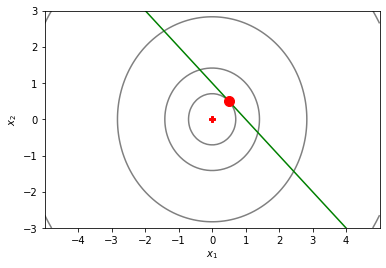

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 목적함수 f(x) = x1^2 + x2^2
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# 등식 제한조건 방정식 g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1

plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

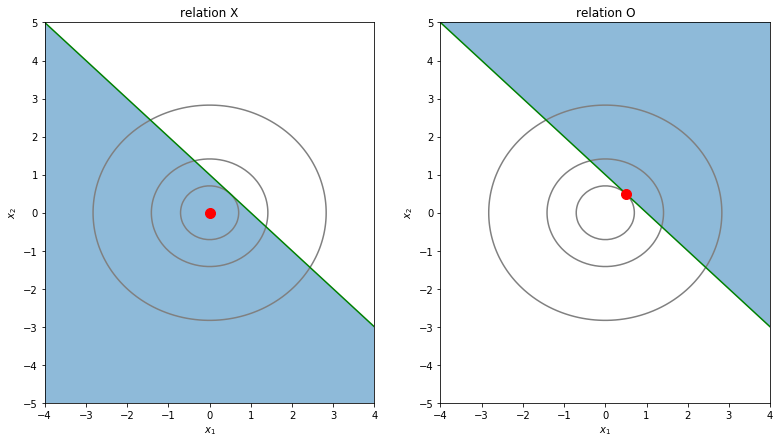

In [40]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("relation X")
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("x_1")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("relation O")
plt.show()

<br/><br/><br/>

# 5.3 선형계획법 문제와 이차계획법 문제

- 선형계획법: 방정식이나 부등식 제한 조건을 가지는 선형 모형(linear model)의 값을 최소화하는 문제를 선형계획법(Linear Programming) 문제라고 함.
- 이차계획법: 방정식이나 부등식 제한 조건을 가지는 일반화된 이차형식(quadratic form)의 값을 최소화하는 문제를 이차계획법(Quadratic Programming) 문제라고 함.

### 선형 계획법

- 제품 A와 제품 B 각각 100개 이상 생산해야 한다.
- 시간은 500시간 밖에 없다.
- 제품 A는 생산하는데 1시간이 걸리고 제품 B는 2시간이 걸린다.
- 특정 부품이 9800개밖에 없다.
- 제품 A는 생산하는데 특정 부품을 4개 필요로 하고 제품 B는 생산하는데 특정 부품을 5개 필요로 한다.
- 제품 A의 이익은 하나당 3만원이고 제품 B의 이익은 하나당 5만원이다.

In [4]:
import numpy as np
import scipy.optimize as opt

A = np.array([[-1, 0], [0, -1], [1, 2], [4, 5]])
b = np.array([-100, -100, 500, 9800])
c = np.array([-3, -5])

result = opt.linprog(c, A, b) # c: 목적함수의 계수 벡터, A: 등식 제한조건의 계수 행렬, b: 등식 제한조건의 상수 벡터
result

     con: array([], dtype=float64)
     fun: -1399.999994807381
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([1.99999991e+02, 4.19920389e-06, 3.31138381e-07, 8.10000001e+03])
  status: 0
 success: True
       x: array([299.99999127, 100.0000042 ])